# zigzag 排序
zigzag 排序如下
![zigzag](images/zigzag.png)

可以看到，移动的情况如下：
1. 左边的格子跳到右边的格子，只能在第一行或最后一行进行，且此时纵坐标为偶数
2. 从上边的格子跳到下边的格子，只能在第一列或最后一列，且此时横坐标为奇数
3. 从右上到左下，横纵坐标之和为奇数
4. 从左下到右上，横纵坐标之和为偶数

据此可以写出 `python` 代码来生成 $8\times 8$ 矩阵的 zigzag 序列

生成的是矩阵二维坐标转换为一维后，在 一维 zigzag 序列中的索引，如： `zigzag[2] = 1 * 8 + 0`

可以利用 zigzag 序列找出块的中频系数（用红色表示）

`python` 计算出的结果可以绘制下图：

![my-zigzag](images/my-zigzag.png)

生成 $K$ 个中频系数

zig:
0, 1, 8, 16, 9, 2, 3, 10,
17, 24, 32, 25, 18, 11, 4, 5,
12, 19, 26, 33, 40, 48, 41, 34,
27, 20, 13, 6, 7, 14, 21, 28,
35, 42, 49, 56, 57, 50, 43, 36,
29, 22, 15, 23, 30, 37, 44, 51,
58, 59, 52, 45, 38, 31, 39, 46,
53, 60, 61, 54, 47, 55, 62, 63,
zig_mid: [5, 12, 19, 26, 33, 40, 48, 41, 34, 27, 20, 13, 6, 7, 14, 21, 28, 35, 42, 49, 56, 57, 50, 43, 36, 29, 22, 15, 23, 30, 37, 44, 51, 58]


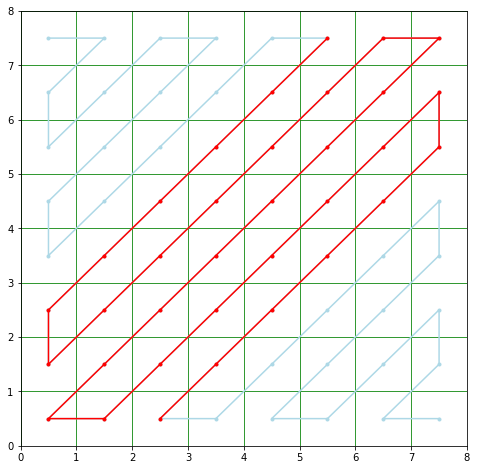

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import math

def zigzag(n):
    matr = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matr[i][j] = i * n + j;
    
    res = np.zeros(n * n);
    steps = 0
    i = 0
    j = 0
    while steps < n * n:
        res[steps] = int(matr[i][j])
        if (i == 0 or i == n - 1) and (j % 2 == 0):
            j = j + 1
        elif (j == 0 or j == n - 1) and (i % 2 == 1):
            i = i + 1
        elif (i + j) % 2 == 1:
            i = i + 1
            j = j - 1
        else:
            i = i - 1
            j = j + 1
        steps = steps + 1
    return res

n = 8
zig = [int(elem) for elem in zigzag(n)]
out = np.array(zig).reshape(n, n)
print("zig:")
for i in range(n):
    cur = [str(elem) for elem in out[i]]
    print(", ".join(cur) + ",")

K = 34

mid = math.floor((n * n + 1) / 2)
low = mid - (math.floor(K / 2))
high = mid + (math.ceil(K / 2))
zig_mid = zig[low : high]
print("zig_mid:", zig_mid)

x_pos = [elem % n + 0.5 for elem in zig]
y_pos = [8 - (elem // n + 0.5) for elem in zig]

x_pos_mid = [elem % n + 0.5 for elem in zig_mid]
y_pos_mid = [8 - (elem // n + 0.5) for elem in zig_mid]

pos = zip(x_pos, y_pos)
pos_mid = zip(x_pos_mid, y_pos_mid)
pos_rest = [elem for elem in pos if elem not in pos_mid]
x_pos_rest, y_pos_rest = zip(*pos_rest)

plt.figure(figsize = (n, n))
plt.axis([0, n, 0, n])
plt.plot(x_pos_rest, y_pos_rest, color = 'lightblue', marker = '.')
plt.plot(x_pos_mid, y_pos_mid, color = 'r', marker = '.')
plt.grid(color = 'g')

# 生成随机的 w 序列
可以采用洗牌算法生成
```
Random(W):
1   N <- length(W)
2   for i <- 1 to N
3       do swap W[i] <-> W(random(i, N))
```

In [53]:
import random
import numpy as np
import math
def swap(a, b):
    a, b = b, a

N = 136
W = np.ones(N)
for i in range(N):
    if i % 2 == 0:
        W[i] = -1

for i in range(N):
    swap(W[i], W[random.randint(i, N-1)])


list = [ str(int(elem)) for elem in W]
col = math.floor(math.sqrt(N))
pad = col - N % col
print(pad)
row = (N + pad) // col
out = list + ["" for i in range(pad)]
out = np.array(out).reshape(row, col)
for i in range(row):
    print(", ".join(out[i]) + ",")

7
-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1,
1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1,
-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1,
1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1,
-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1,
1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1,
-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1,
1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1,
-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1,
1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1,
-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1,
1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1,
-1, 1, -1, 1, , , , , , , ,


# 生成随机的位图，测试分块



In [78]:
import numpy as np
tmp = np.array([[1,2],[3,4]])
print(tmp)
print(tmp.reshape(4))

N = 8
width, height = 2, 2
bmp = np.random.randint(0, 256, (width * N, height * N))
for i in range(N * height):
    out = [str(hex(elem)) for elem in bmp[i]]
    print(",".join(out) + ',')

[[1 2]
 [3 4]]
[1 2 3 4]
0xbb,0x8f,0xbc,0xa6,0xab,0xb9,0x94,0xdf,0x4d,0x57,0xfb,0xb5,0x51,0xeb,0xa3,0x3,
0x58,0x79,0x81,0x9f,0x3,0x83,0x72,0xbb,0xf4,0xc9,0x72,0x48,0x1d,0x44,0xd2,0x32,
0x33,0x23,0x9d,0xb9,0x47,0xd7,0xaa,0xa3,0xc9,0xdd,0x6a,0x55,0xc7,0xb9,0x7d,0x73,
0xd0,0xa2,0xc7,0x1e,0xdf,0xcf,0x78,0xf6,0x10,0xf,0x9c,0x8c,0x9e,0x3e,0xae,0x3,
0xed,0xfe,0x66,0x9,0x4d,0x70,0xa1,0x5d,0x4b,0xc9,0xd9,0xdf,0xac,0x58,0xb3,0x5b,
0xab,0xf3,0x72,0x4f,0xc2,0xb1,0xf5,0xfc,0x82,0x7f,0x48,0x1e,0xa2,0x90,0xff,0xd0,
0xf2,0x7a,0xa3,0x8,0xcb,0x9c,0xab,0xeb,0xd1,0x23,0xe4,0xa3,0xe7,0x9f,0x19,0xfc,
0x5,0x81,0x1f,0x4b,0xac,0x8c,0x38,0x9,0xb4,0xe9,0xd5,0x35,0xed,0xf6,0xc3,0x9a,
0x4b,0x2f,0xa5,0x8d,0x97,0xdf,0x97,0xa4,0xee,0xae,0x28,0x42,0xe9,0xf5,0x71,0xcc,
0xbb,0xb3,0x5e,0x4,0x3a,0x75,0x65,0x69,0xdd,0x54,0x1d,0x43,0xf2,0x9,0xa7,0x58,
0x1d,0x10,0x2f,0xb3,0x8,0x65,0xe1,0xf,0x1d,0x73,0x4d,0x4d,0x6f,0xbb,0xa1,0x25,
0x7f,0x1f,0x35,0x2e,0xc0,0xaf,0x2d,0x8e,0x73,0x50,0x6e,0x7c,0xb6,0x9d,0xb1,0xd3,
0x21,0xc7,0x4e,

# 绘制性能曲线


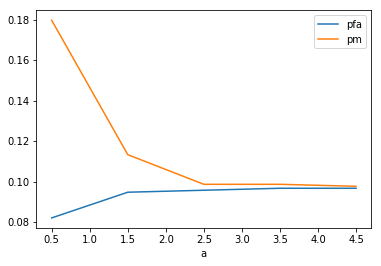

In [11]:
import matplotlib.pyplot as plt
import os

path0 = "build/performance"
suffix = ".txt"

a = [0.5, 1.5, 2.5, 3.5, 4.5]
n = len(a)
pfa = []
pm = []

for i in range(n):
    with open(path0 + str(a[i]) + suffix) as file_obj:
        pfa.append(float(file_obj.readline()[6:]))
        pm.append(float(file_obj.readline()[5:]))

plt.figure(num = 2)
plt.xlabel("a")
plt.plot(a, pfa, label = 'pfa')
plt.plot(a, pm, label = 'pm')
plt.legend()